# Do debates matter?

Presidential debates provide a national platform for U.S. presidential candidates to introduce their polices, take stances on controversial issues, and sometimes take down their opponents. This year has seen many memorable moments over the past [five debates](https://en.wikipedia.org/wiki/2020_Democratic_Party_presidential_debates_and_forums) in the 2020 Democratic Party primaries. Some are shocking: But for Kamala Harris's questioning, many wouldn't have known about Joe Biden's pro-segregation past, considering that he is the same Joe who Barack Obama chose as his vice president and a beloved candidate in the Black community. Some are inspiring: When confronted about her progressive policies, Elizabeth Warren fought back, "Why run for president just to say what we really can't do and shouldn't fight for?" 

**Does debate performance make or break candidates?** On the one hand, Biden remains popular despite his questionable past resurfacing, frequent rambling, and occasional ["record player"](https://time.com/5676679/joe-biden-record-player-2020-debate/) moments. On the other, Harris seems to never have really recovered from her own past as a strict prosecutor being attacked by Tulsi Gabbard. This FiveThirtyEight [article](https://fivethirtyeight.com/features/do-debates-matter/) (or [this one](https://fivethirtyeight.com/features/what-we-know-about-the-impact-of-primary-debates/)) summarized some of the most common beliefs: "**No**, those who watch debates already have strong opinions and don't change minds easily." "**Yes**, they help people understand where a candidate stands and can expose front-runners of their flaws." "**We can't know**... It's hard to trace candidates' rises and falls back to debates."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import seaborn as sns
import datetime

# Polls before and after debates
## Load data
- Pollster rating: https://projects.fivethirtyeight.com/pollster-ratings/

In [2]:
# Read data 
raw = pd.read_csv('president_primary_polls.csv')

# Check first 5 rows
raw.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,113953,62968,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,11/25/19 18:00,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0
1,113953,62968,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,11/25/19 18:00,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Sanders,13257,Bernard Sanders,21.0
2,113953,62968,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,11/25/19 18:00,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Warren,13258,Elizabeth Warren,15.0
3,113953,62968,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,11/25/19 18:00,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Buttigieg,13345,Pete Buttigieg,9.0
4,113953,62968,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,11/25/19 18:00,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Harris,13288,Kamala D. Harris,5.0


## Clean data

In [3]:
# Pollsters' 538 grades B+ or higher
top_grades = ['A+', 'A', 'A-', 'A/B', 'B+', 'B']

# Candiates who participated in all recent debates
top_candidates = ["Joseph R. Biden Jr.",
                  "Elizabeth Warren",
                  "Bernard Sanders",
                  "Pete Buttigieg",
                  "Andrew Yang",
                  "Kamala D. Harris", 
                  "Cory A. Booker", 
                  "Amy Klobuchar",
                  "Julián Castro",
                  "Tulsi Gabbard"]

# Only select polls made by reputable pollsters for top candiates 
polls = raw[(raw['fte_grade'].isin(top_grades)) & (raw['candidate_name']).isin(top_candidates) & (raw['party'] == 'DEM')]

# Only keep potentially useful columns
polls = polls[['state', 'pollster_id', 'pollster', 'fte_grade', 'sample_size', 'created_at', 'candidate_id', 'candidate_name', 'pct']]

# Convert dates at which polls were created to datetime objects
polls['created_at'] = polls['created_at'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M').date())

# Check first 5 rows
polls.head()

,state,pollster_id,pollster,fte_grade,sample_size,created_at,candidate_id,candidate_name,pct
18,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13256,Joseph R. Biden Jr.,12.0
19,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13287,Cory A. Booker,2.2
21,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13345,Pete Buttigieg,13.4
22,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13316,Julián Castro,0.6
24,New Hampshire,458,Suffolk University,A-,500,2019-11-25,13343,Tulsi Gabbard,6.2


## Changes by candidate
### Top 10 candidates

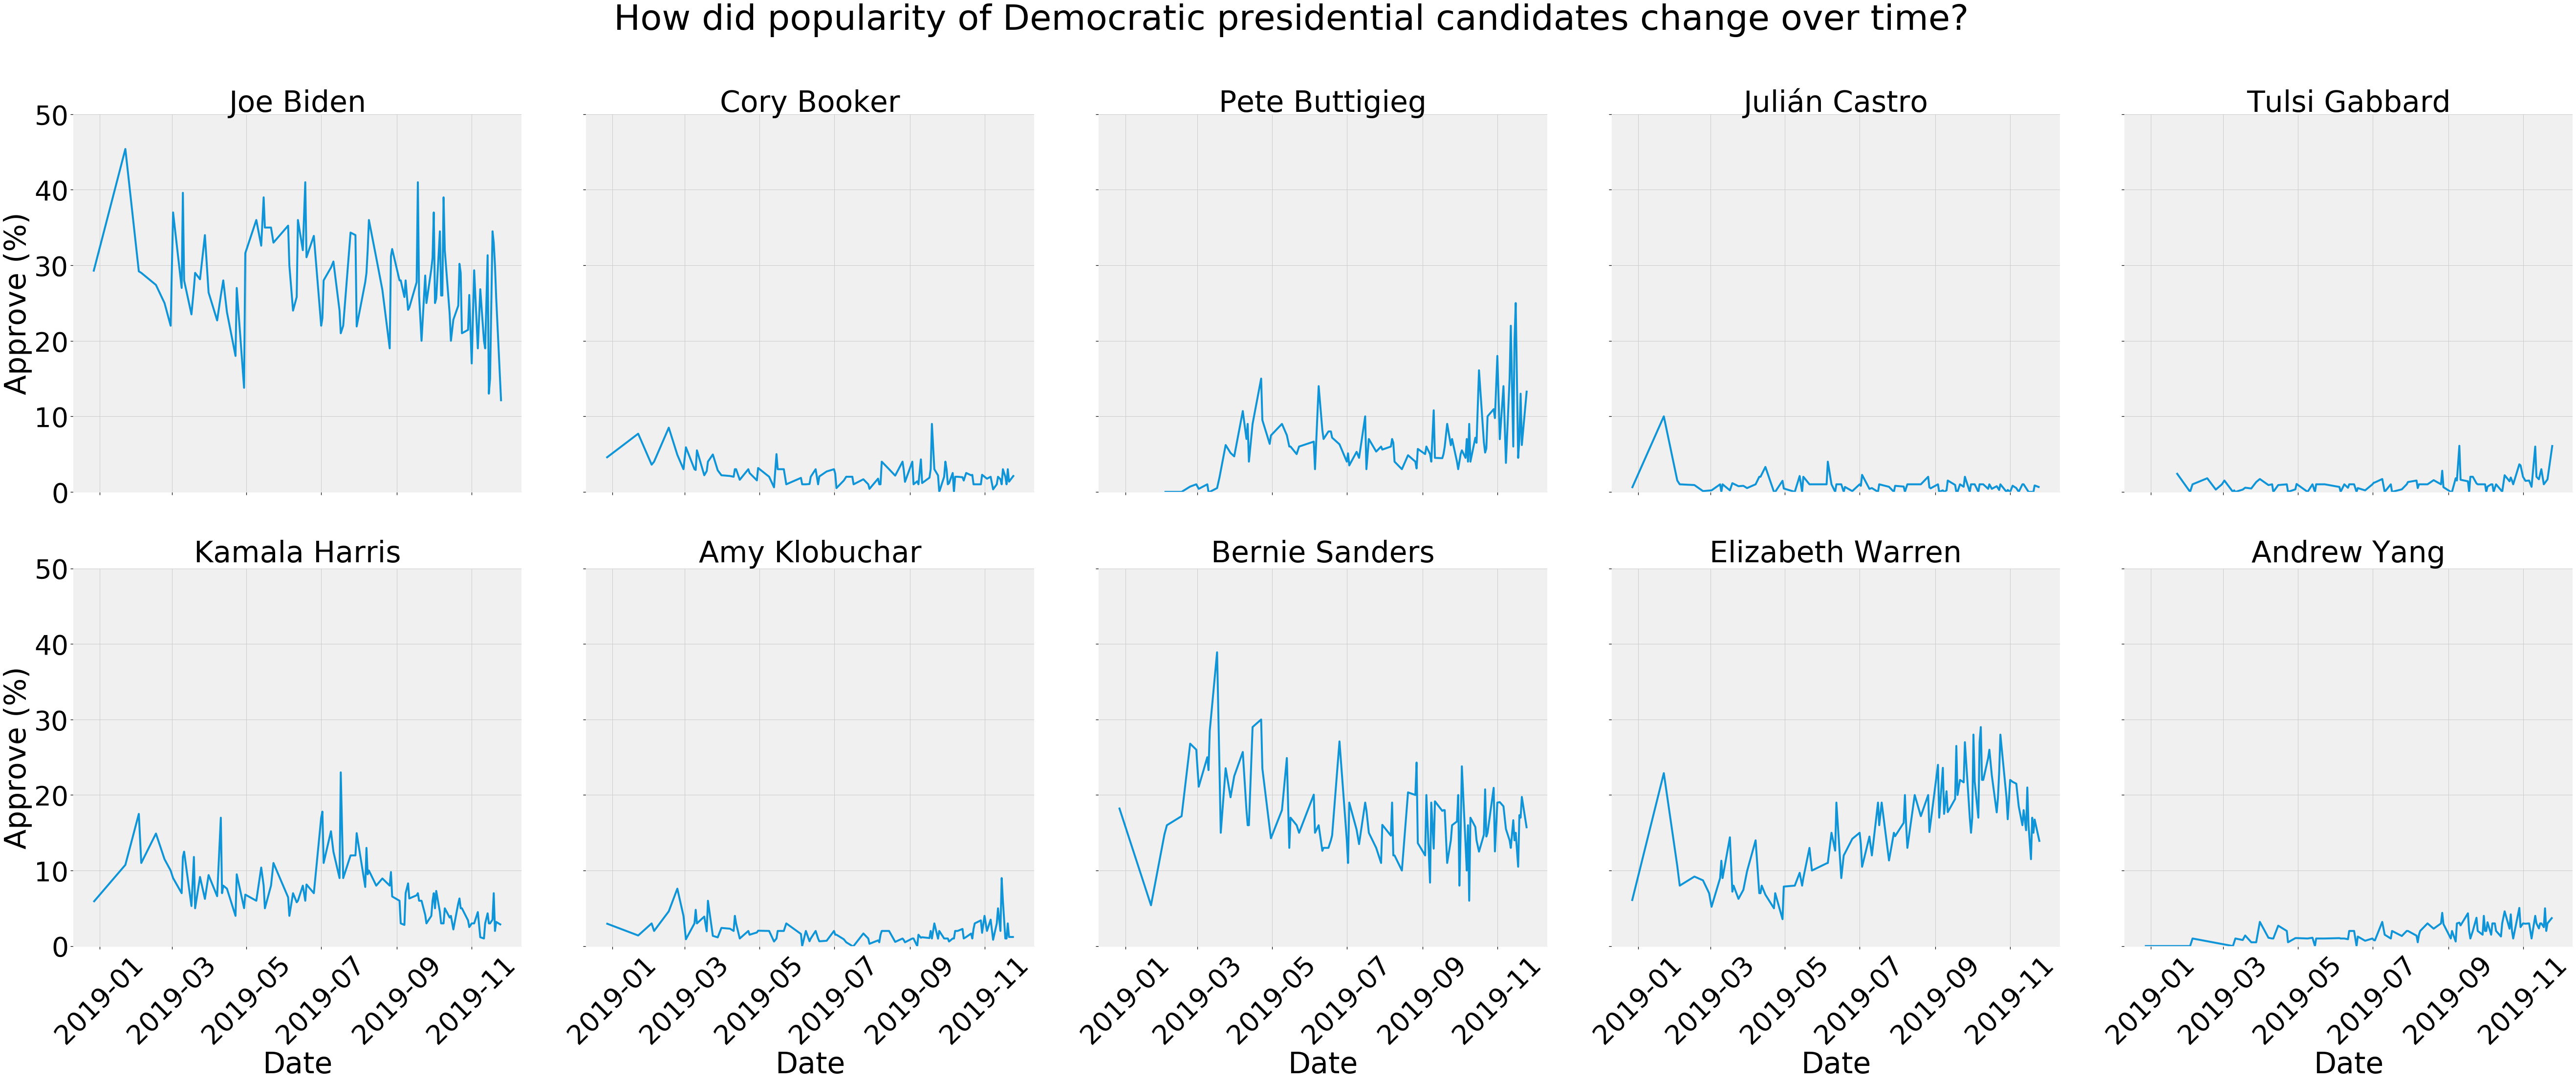

In [73]:
with sns.plotting_context("notebook", font_scale=5):
    
    # Basic plots
    g = sns.FacetGrid(polls, col="candidate_name", col_wrap=5, height=15, ylim=(0, 50))
    
    g.map(sns.lineplot, "created_at", "pct", linewidth=4, color='#0F95D7', ci=None)
    
    # Rename grid by each candiate's name
    axes = g.axes.flatten()
    
    names = ["Joe Biden",
             "Cory Booker", 
             "Pete Buttigieg",
             "Julián Castro",
             "Tulsi Gabbard",
             "Kamala Harris",
             "Amy Klobuchar",
             "Bernie Sanders",
             "Elizabeth Warren",
             "Andrew Yang"]
    
    for i, c in enumerate(names):
        axes[i].set_title(c);
    
    # Rename x-axis 
    for ax in axes:
        ax.set_xlabel("Date")
    
    # Rename y-axis 
    for ax in axes:
        ax.set_ylabel("Approve (%)")
    
    # Adjust x-ticks
    for ax in g.axes:
        _ = plt.setp(ax.get_xticklabels(), visible=True, rotation=45)
            
    # Nicer spacing
    g.fig.tight_layout()
    
    # Add title
    plt.suptitle("How did popularity of Democratic presidential candidates change over time?", y = 1.05)
    
    g.savefig('polls.png')

The forerunners of the race are Joe Biden, Elizabeth Warren, Bernie Sanders, Kamala Harris, and Pete Buttigieg. 

In [52]:
top_5_idx = ["Joseph R. Biden Jr.",
             "Elizabeth Warren",
             "Bernard Sanders",
             "Pete Buttigieg",
             "Kamala D. Harris"]

# Only select polls made by reputable pollsters for top candiates 
top_5 = polls[(polls['candidate_name'].isin(top_5_idx)) & (polls['created_at'] > pd.to_datetime('2019-06-01').date())]

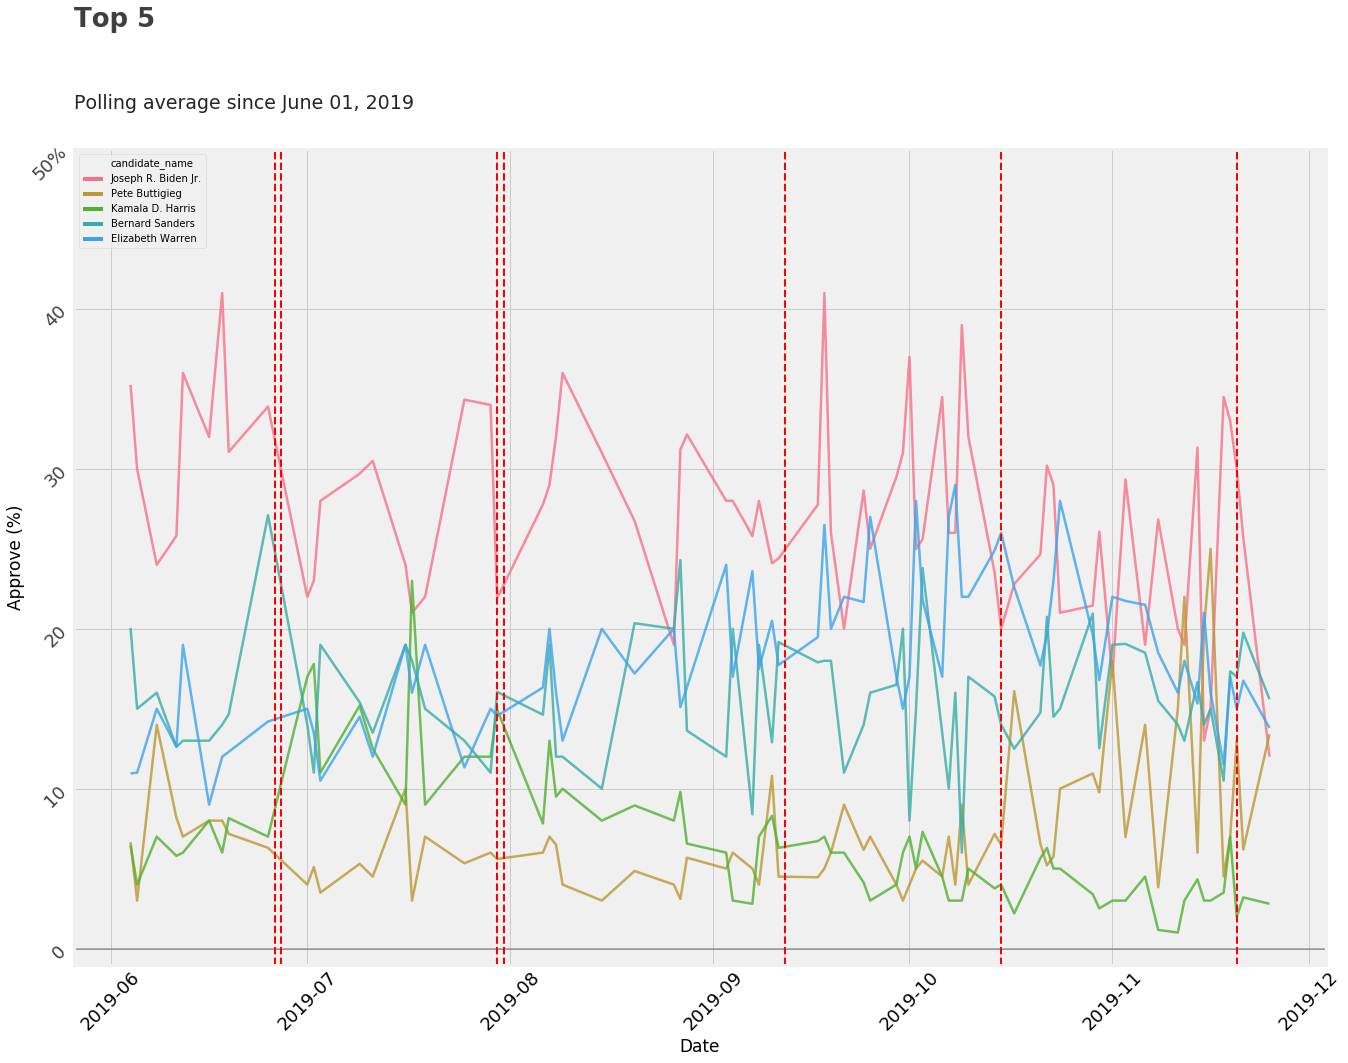

In [66]:
plt.figure(figsize=(20, 15))

sns.set_palette("husl")

ax = sns.lineplot(x="created_at", y="pct", hue="candidate_name", data=top_5, linewidth=2.5, ci=None, alpha=.8)

plt.xlabel('Date', fontsize=17)
plt.ylabel('Approve (%)', fontsize=17)

# Bolded horizontal line at y=0
ax.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)

# Y axis past 0 & above 100 -- grid line will pass 0 & 100 marker
plt.ylim(-1,10)

# Y-labels to only these
ax.set_yticks([0, 10, 20, 30, 40, 50])
ax.set_yticklabels(labels=['0', '10', '20', '30', '40', '50%'], fontsize=14, color='#414141')

ax.tick_params(axis = 'both', which = 'major', labelsize = 18, rotation=45)

plt.text(0, 1.15, "Top 5",
         fontsize = 26, weight = 'bold', alpha = .75, transform=ax.transAxes)

plt.text(0, 1.05, "Polling average since June 01, 2019",
         fontsize = 19, alpha = .85, transform=ax.transAxes)

ax.axvline(pd.to_datetime('2019-06-26'), color='r', linestyle='--', lw=2)

ax.axvline(pd.to_datetime('2019-06-27'), color='r', linestyle='--', lw=2)

ax.axvline(pd.to_datetime('2019-07-30'), color='r', linestyle='--', lw=2)

ax.axvline(pd.to_datetime('2019-07-31'), color='r', linestyle='--', lw=2)

ax.axvline(pd.to_datetime('2019-09-12'), color='r', linestyle='--', lw=2)

ax.axvline(pd.to_datetime('2019-10-15'), color='r', linestyle='--', lw=2)

ax.axvline(pd.to_datetime('2019-11-20'), color='r', linestyle='--', lw=2)

plt.show()

In [76]:
import random
import string

def randomStringDigits(stringLength=6):
    """Generate a random string of letters and digits """
    lettersAndDigits = string.ascii_letters + string.digits
    return ''.join(random.choice(lettersAndDigits) for i in range(stringLength))

print ("Generating a Random String including letters and digits")
print ("First Random String is  ", randomStringDigits(10))
print ("Second Random String is ", randomStringDigits(8))
print ("Third Random String is  ", randomStringDigits(8))

Generating a Random String including letters and digits
First Random String is   Yo6K1sD5ee
Second Random String is  7WWBeQJV
Third Random String is   fMorkES0
